# Multi-Echo Comparison

In [43]:
import os

from nilearn.image import math_img
import numpy as np

from nilearn.plotting import plot_stat_map, plot_roi

In [25]:
bids_dir = '/Users/haroonpopal/hpopal@umd.edu - Google Drive/My Drive/dscn_lab/projects/scon_social_reward/'

os.chdir(bids_dir)

<string>:1: RuntimeWarning: divide by zero encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in divide
/opt/anaconda3/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:1416: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),


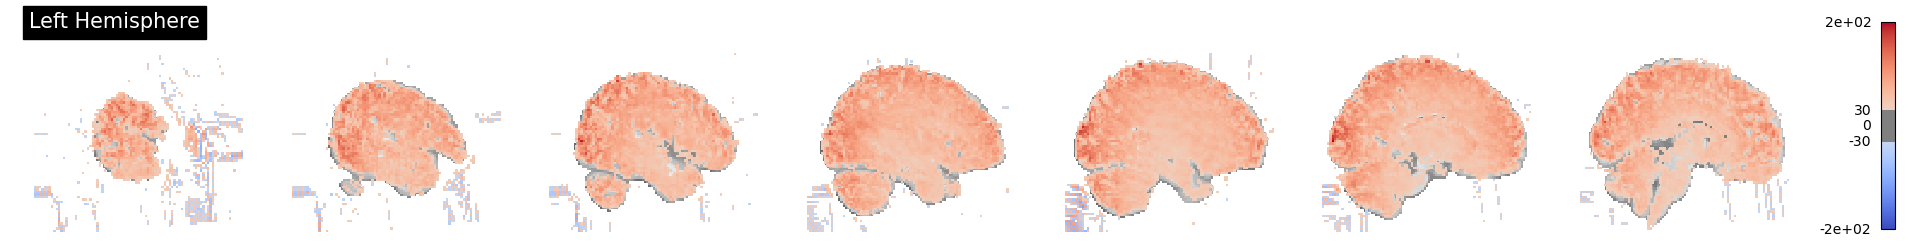

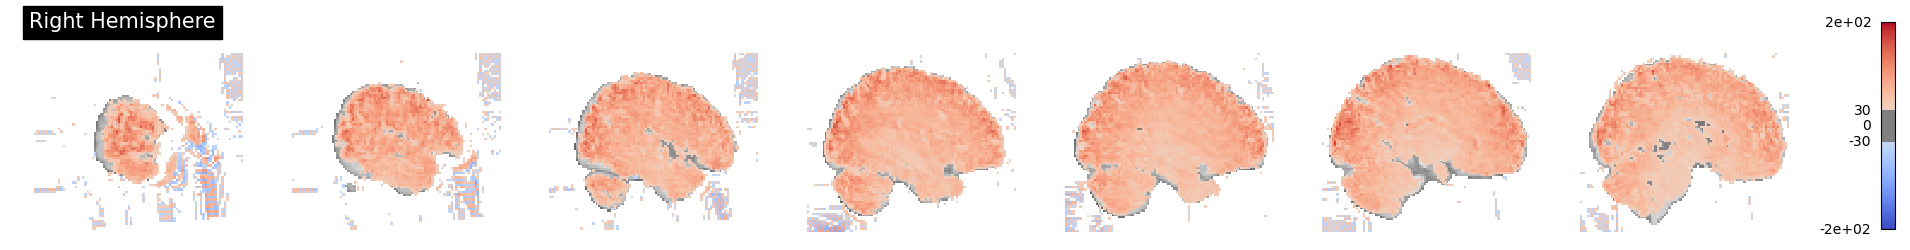

In [75]:
me_data = '/Users/haroonpopal/Desktop/projects/carecab2_imaging/derivatives/fmriprep/sub-YAB2003/func/sub-YAB2003_task-single_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

me_data_snr = math_img('np.mean(img, axis=3)/np.std(img, axis=3)', img=me_data)

thresh = 30

hemi_lh = plot_stat_map(me_data_snr, threshold=thresh,
                        cut_coords=range(-65,0, 10), display_mode='x', colorbar=True, 
                        cmap='coolwarm', symmetric_cbar=True, title='Left Hemisphere',
                        annotate=False)
hemi_rh = plot_stat_map(me_data_snr, threshold=thresh,
                        cut_coords=range(66,5, -10), display_mode='x', colorbar=True,
                        cmap='coolwarm', symmetric_cbar=True, title='Right Hemisphere',
                        annotate=False)

me_data_snr.to_filename(bids_dir+'derivatives/me_data_snr.nii.gz')

<string>:1: RuntimeWarning: invalid value encountered in divide


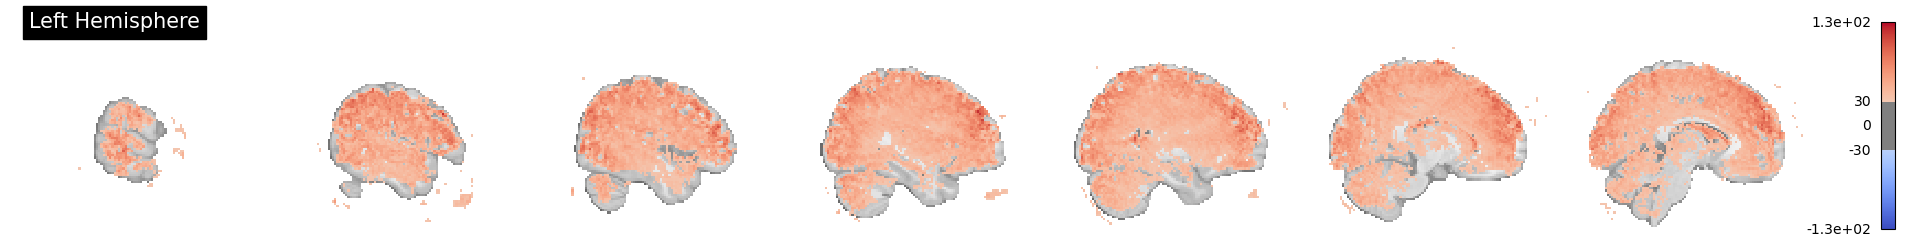

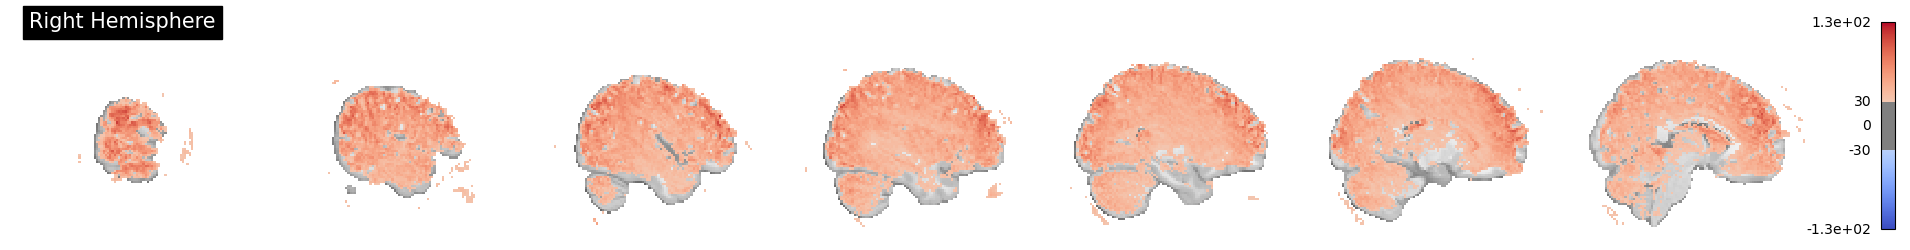

In [77]:
og_data = bids_dir+'derivatives/fmriprep/sub-SCN101/func/sub-SCN101_task-SR_run-4_space-MNI152NLin6Asym_res-2_desc-preproc_bold.nii.gz'

og_data_snr = math_img('np.mean(img, axis=3)/np.std(img, axis=3)', img=og_data)

hemi_lh = plot_stat_map(og_data_snr, threshold=thresh,
                        cut_coords=range(-65,0, 10), display_mode='x', colorbar=True, 
                        cmap='coolwarm', symmetric_cbar=True, title='Left Hemisphere',
                        annotate=False)
hemi_rh = plot_stat_map(og_data_snr, threshold=thresh,
                        cut_coords=range(66,5, -10), display_mode='x', colorbar=True,
                        cmap='coolwarm', symmetric_cbar=True, title='Right Hemisphere',
                        annotate=False)

og_data_snr.to_filename(bids_dir+'derivatives/og_data_snr.nii.gz')

Multi-echo (ME) fMRI sequences provide multiple echo times (TE) per run of data. ME data can improve the signal-to-noise ratio by using the optimal TE for each voxel in the brain during preprocessing, and can improve denoising by utilizing methods such as ME-ICA [Kundu et al., 2017](https://www.sciencedirect.com/science/article/pii/S1053811917302410?casa_token=58VehUHLH70AAAAA:jKnet5ilBWnv1lYrMzUsFkANFE0SP9TAC6Csaq-VHhWxv8faNGTndTUPH0Dg3IWe871MIR0bLps). Different regions of the brain have an optimal TE, such as frontal and temporal regions of the brain which can be improved by using a lower TE (e.g. 15 ms). Whereas traditional single echo fMRI data would require researchers to trade off signal in one brain region to optimize signal in another region, ME fMRI can use the optimal TE per voxel during preprocessing. Furthermore, methods such as ME-ICA can be especially effective for removing motion artifacts [Gonzalex-Castillo et al., 2016](https://www.sciencedirect.com/science/article/pii/S1053811916303639?casa_token=z0KVsE-cWvIAAAAA:qdjT_2UMGhLiouCEHjqUNltwWX8Dx2TLNzFjhTP4-6pc6pLZNPdLVFvn--cDiCCGMvx1bmkdZ_Q). ME fMRI sequences have been shown to significantly improve effect size measurements in regions of the brain that are particularly important for mentalizing such as the orbitofrontal cortex [Lombardo et al., 2016](https://www.sciencedirect.com/science/article/pii/S1053811916303299). 